<h1 align=center>Dr Appointments</h1>

`Targets: `
- Storing data in mongodb atlas
- Running ETL Pipeline
- Adding human in loop to the project

In [202]:
import os
from dotenv import load_dotenv
load_dotenv()


from pydantic import BaseModel, Field, field_validator
import re
import pandas as pd
from typing import  Literal,List,Any

from langchain_core.tools import tool
from typing_extensions import TypedDict, Annotated
from langgraph.graph.message import add_messages
from langgraph.types import Command
from langgraph.graph import START, StateGraph,END
from langchain_core.messages import HumanMessage,AIMessage
from langchain_core.prompts.chat import ChatPromptTemplate
from langgraph.prebuilt import create_react_agent



In [203]:
# os.environ["GROQ_API_KEY"]= os.getenv("GROQ_API_KEY")
# os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [204]:
# from langchain_groq import ChatGroq

# llm=ChatGroq(model_name="deepseek-r1-distill-llama-70b")

In [205]:
# results = llm.invoke("tell me about groq in a sentence")
# print(results.content)

In [206]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

# Load environment variables from .env file
load_dotenv()

# Retrieve the API key safely
groq_api_key = os.getenv("GROQ_API_KEY")
if not groq_api_key:
    raise ValueError("GROQ_API_KEY not found in environment variables.")

# Set the environment variable (optional depending on how ChatGroq uses it)
os.environ["GROQ_API_KEY"] = groq_api_key

# Initialize the LLM
llm = ChatGroq(model_name="deepseek-r1-distill-llama-70b")

# Invoke a test query
response = llm.invoke("Tell me about Groq in a sentence.")
print(response.content)

<think>
Okay, so I need to tell me about Groq in a sentence. Hmm, I'm not familiar with Groq, so I should probably start by figuring out what it is. Maybe it's a company or a product? Let me think... I remember hearing something about AI chips or hardware. Perhaps Groq is related to that.

I think Groq is a company that makes chips for AI. I recall that there are companies like NVIDIA and Google with their own AI accelerators, so maybe Groq is another player in that space. They might be known for high-performance chips. 

Wait, I think Groq was founded by some ex-Google employees. That could be a key point. They probably focus on machine learning and AI workloads, maybe for data centers or cloud computing. High efficiency or speed might be their selling point. 

I should check if they're known for any specific technology, like ASICs (Application-Specific Integrated Circuits). Yeah, I think they use custom silicon for their chips. Maybe they're competitors to TPU (Tensor Processing Unit

In [207]:
from langchain_openai import ChatOpenAI

OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

openai_model=ChatOpenAI(model="gpt-4o")
openai_model.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_55d88aaf2f', 'id': 'chatcmpl-Bj9GKr8A3Wue5VG7UTVGQvkhcFzqF', 'finish_reason': 'stop', 'logprobs': None}, id='run--b30f8152-a54a-46ac-8485-f7f18147ba0c-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [208]:
import re
from pydantic import BaseModel, Field, field_validator


class DateTimeModel(BaseModel):
    date: str = Field(
        description="Properly formatted datetime",
        pattern=r'^\d{2}-\d{2}-\d{4} \d{2}:\d{2}$'
    )

    @field_validator("date")
    def check_format_date(cls, v: str) -> str:
        if not re.match(r'^\d{2}-\d{2}-\d{4} \d{2}:\d{2}$', v):
            raise ValueError("The date must be in the format 'DD-MM-YYYY HH:MM'")
        return v


class DateModel(BaseModel):
    date: str = Field(
        description="Properly formatted date",
        pattern=r'^\d{2}-\d{2}-\d{4}$'
    )

    @field_validator("date")
    def check_format_date(cls, v: str) -> str:
        if not re.match(r'^\d{2}-\d{2}-\d{4}$', v):
            raise ValueError("The date must be in the format 'DD-MM-YYYY'")
        return v


class IdentificationNumberModel(BaseModel):
    id: int = Field(description="Identification number (7 or 8 digits)")

    @field_validator("id")
    def check_format_id(cls, v: int) -> int:
        if not re.match(r'^\d{7,8}$', str(v)):
            raise ValueError("The ID must be a 7 or 8-digit number.")
        return v


In [209]:
# class DateTimeModel(BaseModel):
#     date: str = Field(description="Properly formatted date", pattern=r'^\d{2}-\d{2}-\d{4} \d{2}:\d{2}$')

#     @field_validator("date")
#     def check_format_date(cls, v):
#         if not re.match(r'^\d{2}-\d{2}-\d{4} \d{2}:\d{2}$', v):  # Ensures 'DD-MM-YYYY HH:MM' format
#             raise ValueError("The date should be in format 'DD-MM-YYYY HH:MM'")
#         return v

In [210]:
# class DateModel(BaseModel):
#     date: str = Field(description="Properly formatted date", pattern=r'^\d{2}-\d{2}-\d{4}$')

#     @field_validator("date")
#     def check_format_date(cls, v):
#         if not re.match(r'^\d{2}-\d{2}-\d{4}$', v):  # Ensures DD-MM-YYYY format
#             raise ValueError("The date must be in the format 'DD-MM-YYYY'")
#         return v

In [211]:
# class IdentificationNumberModel(BaseModel):
#     id: int = Field(description="Identification number (7 or 8 digits long)")
#     @field_validator("id")
#     def check_format_id(cls, v):
#         if not re.match(r'^\d{7,8}$', str(v)):  # Convert to string before matching
#             raise ValueError("The ID number should be a 7 or 8-digit number")
#         return v

In [212]:
print(DateTimeModel(date="22-12-2023 09:45"))

print(DateModel(date="03-09-2024"))

print(IdentificationNumberModel(id="78797516"))

date='22-12-2023 09:45'
date='03-09-2024'
id=78797516


In [213]:
import pandas as pd

# Load the CSV into a DataFrame
try:
    df = pd.read_csv("availability.csv")
    print("✅ Data loaded successfully. Here's a preview:")
    display(df.head())  # Use display() in Jupyter
except FileNotFoundError:
    print("❌ Error: 'availability.csv' file not found.")
except pd.errors.ParserError:
    print("❌ Error: Problem parsing 'availability.csv'. Check formatting.")


✅ Data loaded successfully. Here's a preview:


,date_slot,specialization,doctor_name,is_available,patient_to_attend
0,05-08-2024 08:00,general_dentist,john doe,False,1000082.0
1,05-08-2024 08:30,general_dentist,john doe,False,1000082.0
2,05-08-2024 09:00,general_dentist,john doe,False,1000048.0
3,05-08-2024 09:30,general_dentist,john doe,False,1000036.0
4,05-08-2024 10:00,general_dentist,john doe,False,1000024.0


In [214]:
import json

records=list(json.loads(df.T.to_json()).values())
records[:2]

[{'date_slot': '05-08-2024 08:00',
  'specialization': 'general_dentist',
  'doctor_name': 'john doe',
  'is_available': False,
  'patient_to_attend': 1000082.0},
 {'date_slot': '05-08-2024 08:30',
  'specialization': 'general_dentist',
  'doctor_name': 'john doe',
  'is_available': False,
  'patient_to_attend': 1000082.0}]

In [215]:
pd.DataFrame(list(records))[:2]

,date_slot,specialization,doctor_name,is_available,patient_to_attend
0,05-08-2024 08:00,general_dentist,john doe,False,1000082.0
1,05-08-2024 08:30,general_dentist,john doe,False,1000082.0


In [216]:
df['time'] = df['date_slot'].apply(lambda input: input.split(' ')[-1])
df.time

0       08:00
1       08:30
2       09:00
3       09:30
4       10:00
        ...  
4275    14:30
4276    15:00
4277    15:30
4278    16:00
4279    16:30
Name: time, Length: 4280, dtype: object

In [217]:
dates = df['date_slot'].apply(lambda input: input.split(' ')[0])
dates

0       05-08-2024
1       05-08-2024
2       05-08-2024
3       05-08-2024
4       05-08-2024
           ...    
4275    03-09-2024
4276    03-09-2024
4277    03-09-2024
4278    03-09-2024
4279    03-09-2024
Name: date_slot, Length: 4280, dtype: object

In [218]:
df[(dates == "05-08-2024")&(df.doctor_name == "john doe")&(df.is_available == False)]['time'].tolist()

['08:00',
 '08:30',
 '09:00',
 '09:30',
 '10:00',
 '10:30',
 '11:00',
 '11:30',
 '12:00',
 '12:30',
 '13:00',
 '13:30',
 '14:00',
 '14:30',
 '15:00',
 '15:30',
 '16:00',
 '16:30']

In [219]:
(df[(dates == "05-08-2024") & (df.doctor_name == "john doe") & (df.is_available == True)]['time']).tolist()

[]

In [220]:
# @tool
# def check_availability_by_doctor(desired_date:DateModel, doctor_name:Literal['kevin anderson','robert martinez','susan davis','daniel miller','sarah wilson','michael green','lisa brown','jane smith','emily johnson','john doe']):
#     """
#     Checking the database if we have availability for the specific doctor.
#     The parameters should be mentioned by the user in the query
#     """
#     df = pd.read_csv(r"availability.csv")
    
#     df['date_slot_time'] = df['date_slot'].apply(lambda input: input.split(' ')[-1])
    
#     rows = list(df[(df['date_slot'].apply(lambda input: input.split(' ')[0]) == desired_date.date)&(df['doctor_name'] == doctor_name)&(df['is_available'] == True)]['date_slot_time'])

#     if len(rows) == 0:
#         output = "No availability in the entire day"
#     else:
#         output = f'This availability for {desired_date.date}\n'
#         output += "Available slots: " + ', '.join(rows)

#     return output

In [221]:
from typing import Literal
import pandas as pd
from langchain.tools import tool


@tool
def check_availability_by_doctor(
    desired_date: DateModel,
    doctor_name: Literal[
        'kevin anderson', 'robert martinez', 'susan davis',
        'daniel miller', 'sarah wilson', 'michael green',
        'lisa brown', 'jane smith', 'emily johnson', 'john doe'
    ]
) -> str:
    """
    Check availability for a specific doctor on a given date.
    """
    try:
        df = pd.read_csv("availability.csv")
    except FileNotFoundError:
        return "Availability database not found."

    # Filter rows where date matches and doctor is available
    df['date'] = df['date_slot'].apply(lambda x: x.split(' ')[0])
    df['time'] = df['date_slot'].apply(lambda x: x.split(' ')[1])

    available_slots = df[
        (df['date'] == desired_date.date) &
        (df['doctor_name'].str.lower() == doctor_name.lower()) &
        (df['is_available'] == True)
    ]['time'].tolist()

    if not available_slots:
        return f"No availability for Dr. {doctor_name.title()} on {desired_date.date}."
    
    return (
        f"✅ Availability for Dr. {doctor_name.title()} on {desired_date.date}:\n"
        f"🕒 Available time slots: {', '.join(available_slots)}"
    )


In [222]:
print(
    check_availability_by_doctor.invoke({
        "desired_date": DateModel(date="03-09-2024"),
        "doctor_name": "kevin anderson"
    })
)

✅ Availability for Dr. Kevin Anderson on 03-09-2024:
🕒 Available time slots: 12:30, 14:00, 14:30, 15:00


In [223]:
# @tool
# def check_availability_by_specialization(desired_date:DateModel, specialization:Literal["general_dentist", "cosmetic_dentist", "prosthodontist", "pediatric_dentist","emergency_dentist","oral_surgeon","orthodontist"]):
#     """
#     Checking the database if we have availability for the specific specialization.
#     The parameters should be mentioned by the user in the query
#     """
#     #Dummy data
#     df = pd.read_csv(r"availability.csv")
#     df['date_slot_time'] = df['date_slot'].apply(lambda input: input.split(' ')[-1])
#     rows = df[(df['date_slot'].apply(lambda input: input.split(' ')[0]) == desired_date.date) & (df['specialization'] == specialization) & (df['is_available'] == True)].groupby(['specialization', 'doctor_name'])['date_slot_time'].apply(list).reset_index(name='available_slots')

#     if len(rows) == 0:
#         output = "No availability in the entire day"
#     else:
#         def convert_to_am_pm(time_str):
#             # Split the time string into hours and minutes
#             time_str = str(time_str)
#             hours, minutes = map(int, time_str.split(":"))
            
#             # Determine AM or PM
#             period = "AM" if hours < 12 else "PM"
            
#             # Convert hours to 12-hour format
#             hours = hours % 12 or 12
            
#             # Format the output
#             return f"{hours}:{minutes:02d} {period}"
#         output = f'This availability for {desired_date.date}\n'
#         for row in rows.values:
#             output += row[1] + ". Available slots: \n" + ', \n'.join([convert_to_am_pm(value)for value in row[2]])+'\n'

#     return output

In [224]:
@tool
def check_availability_by_specialization(
    desired_date: DateModel,
    specialization: Literal[
        "general_dentist", "cosmetic_dentist", "prosthodontist",
        "pediatric_dentist", "emergency_dentist", "oral_surgeon", "orthodontist"
    ]
) -> str:
    """
    Check availability for a specific specialization on a given date.
    """
    try:
        df = pd.read_csv("availability.csv")
    except FileNotFoundError:
        return "Availability database not found."

    # Extract date and time parts once
    df['date'] = df['date_slot'].apply(lambda x: x.split(' ')[0])
    df['time'] = df['date_slot'].apply(lambda x: x.split(' ')[1])

    # Filter rows matching date, specialization, and availability
    filtered = df[
        (df['date'] == desired_date.date) &
        (df['specialization'] == specialization) &
        (df['is_available'] == True)
    ]

    if filtered.empty:
        return f"No availability for specialization '{specialization}' on {desired_date.date}."

    # Group by doctor_name and aggregate time slots
    grouped = filtered.groupby('doctor_name')['time'].apply(list).reset_index()

    def convert_to_am_pm(time_str: str) -> str:
        hours, minutes = map(int, time_str.split(":"))
        period = "AM" if hours < 12 else "PM"
        hours = hours % 12 or 12
        return f"{hours}:{minutes:02d} {period}"

    output = f"✅ Availability for specialization '{specialization}' on {desired_date.date}:\n"
    for _, row in grouped.iterrows():
        doctor = row['doctor_name'].title()
        slots = ', '.join(convert_to_am_pm(t) for t in row['time'])
        output += f"- Dr. {doctor}: {slots}\n"

    return output


In [225]:
print(
    check_availability_by_specialization.invoke({
        "desired_date": DateModel(date="03-09-2024"),
        "specialization": "orthodontist"
    })
)


✅ Availability for specialization 'orthodontist' on 03-09-2024:
- Dr. Kevin Anderson: 12:30 PM, 2:00 PM, 2:30 PM, 3:00 PM



In [226]:
# @tool
# def set_appointment(desired_date:DateTimeModel, id_number:IdentificationNumberModel, doctor_name:Literal['kevin anderson','robert martinez','susan davis','daniel miller','sarah wilson','michael green','lisa brown','jane smith','emily johnson','john doe']):
#     """
#     Set appointment or slot with the doctor.
#     The parameters MUST be mentioned by the user in the query.
#     """
#     df = pd.read_csv(r"availability.csv")
   
#     from datetime import datetime
#     def convert_datetime_format(dt_str): ######## not used
#         # Parse the input datetime string
#         #dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M")
#         dt = datetime.strptime(dt_str, "%d-%m-%Y %H:%M")
        
#         # Format the output as 'DD-MM-YYYY H.M' (removing leading zero from hour only)
#         return dt.strftime("%d-%m-%Y %#H.%M")
    
#     # case = df[(df['date_slot'] == convert_datetime_format(desired_date.date))&(df['doctor_name'] == doctor_name)&(df['is_available'] == True)]
#     case = df[(df['date_slot'] == desired_date.date)&(df['doctor_name'] == doctor_name)&(df['is_available'] == True)]
    
#     if len(case) == 0:
#         return "No available appointments for that particular case"
#     else:
#         # df.loc[(df['date_slot'] == convert_datetime_format(desired_date.date))&(df['doctor_name'] == doctor_name) & (df['is_available'] == True), ['is_available','patient_to_attend']] = [False, id_number.id]
#         df.loc[(df['date_slot'] == desired_date.date)&(df['doctor_name'] == doctor_name) & (df['is_available'] == True), ['is_available','patient_to_attend']] = [False, id_number.id]
        
#         df.to_csv(f"availability.csv", index = False)

#         return "Succesfully done"
    

In [227]:
@tool
def set_appointment(
    desired_date: DateTimeModel,
    id_number: IdentificationNumberModel,
    doctor_name: Literal[
        'kevin anderson', 'robert martinez', 'susan davis', 'daniel miller',
        'sarah wilson', 'michael green', 'lisa brown', 'jane smith',
        'emily johnson', 'john doe'
    ]
) -> str:
    """
    Set an appointment slot with the doctor if available.
    """
    try:
        df = pd.read_csv("availability.csv")
    except FileNotFoundError:
        return "Availability database not found."

    # The 'date_slot' column format is assumed to be "DD-MM-YYYY HH:MM"
    # Make sure your desired_date.date is in that exact format.

    # Filter available slots matching the date_slot and doctor
    matching_rows = df[
        (df['date_slot'] == desired_date.date) &
        (df['doctor_name'].str.lower() == doctor_name.lower()) &
        (df['is_available'] == True)
    ]

    if matching_rows.empty:
        return f"No available appointments for Dr. {doctor_name.title()} at {desired_date.date}."

    # Update the first available slot found
    index_to_update = matching_rows.index[0]
    df.loc[index_to_update, 'is_available'] = False
    df.loc[index_to_update, 'patient_to_attend'] = id_number.id

    # Save the updated availability back to CSV
    df.to_csv("availability.csv", index=False)

    return f"Appointment successfully booked with Dr. {doctor_name.title()} on {desired_date.date}."


In [228]:
df[(df.date_slot == "03-09-2024 08:00")&(df.doctor_name=="kevin anderson")]

,date_slot,specialization,doctor_name,is_available,patient_to_attend,time
4262,03-09-2024 08:00,orthodontist,kevin anderson,False,1111223.0,08:00


In [229]:
Date = DateTimeModel(date="03-09-2024 08:00")
IDNumber = IdentificationNumberModel(id=1111223)  # id as int

print(
    set_appointment.invoke({
        "desired_date": Date,
        "id_number": IDNumber,
        "doctor_name": "kevin anderson"
    })
)

No available appointments for Dr. Kevin Anderson at 03-09-2024 08:00.


In [230]:
Date = DateTimeModel(date="03-09-2024 08:30")
IDNumber = IdentificationNumberModel(id=1111111)  # id as int

print(
    set_appointment.invoke({
        "desired_date": Date,
        "id_number": IDNumber,
        "doctor_name": "kevin anderson"
    })
)

No available appointments for Dr. Kevin Anderson at 03-09-2024 08:30.


In [231]:
df[(df.date_slot == "03-09-2024 08:00")&(df.doctor_name=="kevin anderson")]

,date_slot,specialization,doctor_name,is_available,patient_to_attend,time
4262,03-09-2024 08:00,orthodontist,kevin anderson,False,1111223.0,08:00


In [232]:
# @tool
# def cancel_appointment(date:DateTimeModel, id_number:IdentificationNumberModel, doctor_name:Literal['kevin anderson','robert martinez','susan davis','daniel miller','sarah wilson','michael green','lisa brown','jane smith','emily johnson','john doe']):
#     """
#     Canceling an appointment.
#     The parameters MUST be mentioned by the user in the query.
#     """
#     df = pd.read_csv(r"availability.csv")
#     case_to_remove = df[(df['date_slot'] == date.date)&(df['patient_to_attend'] == id_number.id)&(df['doctor_name'] == doctor_name)]
#     if len(case_to_remove) == 0:
#         return "You don´t have any appointment with that specifications"
#     else:
#         df.loc[(df['date_slot'] == date.date) & (df['patient_to_attend'] == id_number.id) & (df['doctor_name'] == doctor_name), ['is_available', 'patient_to_attend']] = [True, None]
#         df.to_csv(f"availability.csv", index = False)

#         return "Successfully cancelled"

In [233]:
import os

@tool
def cancel_appointment(
    date: DateTimeModel,
    id_number: IdentificationNumberModel,
    doctor_name: Literal[
        'kevin anderson', 'robert martinez', 'susan davis', 'daniel miller',
        'sarah wilson', 'michael green', 'lisa brown', 'jane smith',
        'emily johnson', 'john doe'
    ]
) -> str:
    """
    Cancel an appointment.
    The parameters MUST be mentioned by the user in the query.
    """
    try:
        csv_path = os.path.abspath("availability.csv")
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        return "Availability database not found."

    date_str = date.date.strip()
    doctor_name_lower = doctor_name.lower().strip()

    case_to_remove = df[
        (df['date_slot'] == date_str) &
        (df['patient_to_attend'] == id_number.id) &
        (df['doctor_name'].str.lower().str.strip() == doctor_name_lower)
    ]

    if case_to_remove.empty:
        return "You don’t have any appointment with those specifications."

    df.loc[
        (df['date_slot'] == date_str) &
        (df['patient_to_attend'] == id_number.id) &
        (df['doctor_name'].str.lower().str.strip() == doctor_name_lower),
        ['is_available', 'patient_to_attend']
    ] = [True, None]

    df.to_csv(csv_path, index=False)

    return "Successfully cancelled the appointment."


In [234]:
print(cancel_appointment.invoke({
    "date": DateTimeModel(date="03-09-2024 08:30"),
    "id_number": IdentificationNumberModel(id=1111223), 
    "doctor_name": "kevin anderson"
}))


You don’t have any appointment with those specifications.


In [235]:
# ## Tools For Booking agent
# @tool
# def reschedule_appointment(old_date:DateTimeModel, new_date:DateTimeModel, id_number:IdentificationNumberModel, doctor_name:Literal['kevin anderson','robert martinez','susan davis','daniel miller','sarah wilson','michael green','lisa brown','jane smith','emily johnson','john doe']):
#     """
#     Rescheduling an appointment.
#     The parameters MUST be mentioned by the user in the query.
#     """
#     #Dummy data
#     df = pd.read_csv(r"availability.csv")
#     available_for_desired_date = df[(df['date_slot'] == new_date.date)&(df['is_available'] == True)&(df['doctor_name'] == doctor_name)]
#     if len(available_for_desired_date) == 0:
#         return "Not available slots in the desired period"
#     else:
#         cancel_appointment.invoke({'date':old_date, 'id_number':id_number, 'doctor_name':doctor_name})
#         set_appointment.invoke({'desired_date':new_date, 'id_number': id_number, 'doctor_name': doctor_name})
#         return "Successfully rescheduled for the desired time"

In [236]:
@tool
def reschedule_appointment(
    old_date: DateTimeModel,
    new_date: DateTimeModel,
    id_number: IdentificationNumberModel,
    doctor_name: Literal[
        'kevin anderson', 'robert martinez', 'susan davis', 'daniel miller',
        'sarah wilson', 'michael green', 'lisa brown', 'jane smith',
        'emily johnson', 'john doe'
    ]
) -> str:
    """
    Reschedule an appointment.
    The parameters MUST be mentioned by the user in the query.
    """
    csv_path = os.path.abspath("availability.csv")
    df = pd.read_csv(csv_path)
    df['doctor_name_norm'] = df['doctor_name'].str.lower().str.strip()
    doctor_name_norm = doctor_name.lower().strip()

    available_for_desired_date = df[
        (df['date_slot'] == new_date.date) &
        (df['is_available'] == True) &
        (df['doctor_name_norm'] == doctor_name_norm)
    ]

    if available_for_desired_date.empty:
        return "No available slots in the desired period."

    # Call cancel and set appointment tools and capture their responses
    cancel_response = cancel_appointment.invoke({
        'date': old_date,
        'id_number': id_number,
        'doctor_name': doctor_name
    })

    set_response = set_appointment.invoke({
        'desired_date': new_date,
        'id_number': id_number,
        'doctor_name': doctor_name
    })

    return f"Reschedule result:\nCancel: {cancel_response}\nSet: {set_response}"


In [237]:
Old_Date_Time = DateTimeModel(date="03-09-2024 08:30")
Old_Date_Time

DateTimeModel(date='03-09-2024 08:30')

In [238]:
New_Date_Time = DateTimeModel(date="03-09-2024 11:30")
New_Date_Time

DateTimeModel(date='03-09-2024 11:30')

In [239]:
IDNumber = IdentificationNumberModel(id=1111111)
IDNumber

IdentificationNumberModel(id=1111111)

In [240]:
print(reschedule_appointment.invoke({
    "old_date": Old_Date_Time,
    "new_date": New_Date_Time,
    "id_number": IDNumber,
    "doctor_name": "kevin anderson"
}))


No available slots in the desired period.


In [241]:
df[(df.doctor_name=="john doe")&(df.is_available==True)]

,date_slot,specialization,doctor_name,is_available,patient_to_attend,time
36,07-08-2024 08:00,general_dentist,john doe,True,NaN,08:00
37,07-08-2024 08:30,general_dentist,john doe,True,NaN,08:30
39,07-08-2024 09:30,general_dentist,john doe,True,NaN,09:30
41,07-08-2024 10:30,general_dentist,john doe,True,NaN,10:30
42,07-08-2024 11:00,general_dentist,john doe,True,NaN,11:00
...,...,...,...,...,...,...
421,03-09-2024 13:30,general_dentist,john doe,True,NaN,13:30
422,03-09-2024 14:00,general_dentist,john doe,True,NaN,14:00
423,03-09-2024 14:30,general_dentist,john doe,True,NaN,14:30
424,03-09-2024 15:00,general_dentist,john doe,True,NaN,15:00


In [242]:
# class Router(TypedDict):
#     next: Literal["information_node","booking_node","FINISH"]
#     reasoning: str
    

In [243]:
# class AgentState(TypedDict):
#     messages: Annotated[list[Any], add_messages]
#     id_number: int
#     next:str
#     query: str
#     current_reasoning: str

In [244]:
# members_dict = {'information_node':'specialized agent to provide information related to availability of doctors or any FAQs related to hospital.','booking_node':'specialized agent to only to book, cancel or reschedule appointment'}

# members_dict

In [245]:
from typing import TypedDict, Literal, Any
from typing_extensions import Annotated

# Define the routing dictionary, indicating the next node and the reasoning behind it
class Router(TypedDict):
    next: Literal["information_node", "booking_node", "FINISH"]
    reasoning: str

# Define the agent state, including messages and tracking info
class AgentState(TypedDict):
    messages: Annotated[list[Any], 'add_messages']  # You may want to define add_messages somewhere
    id_number: int
    next: str
    query: str
    current_reasoning: str

# Mapping of node names to their descriptions
members_dict = {
    'information_node': 'specialized agent to provide information related to availability of doctors or any FAQs related to hospital.',
    'booking_node': 'specialized agent to only to book, cancel or reschedule appointment'
}

members_dict

{'information_node': 'specialized agent to provide information related to availability of doctors or any FAQs related to hospital.',
 'booking_node': 'specialized agent to only to book, cancel or reschedule appointment'}

In [246]:
options = list(members_dict.keys()) + ["FINISH"]

options

['information_node', 'booking_node', 'FINISH']

In [247]:
worker_info = '\n\n'.join([f'WORKER: {member} \nDESCRIPTION: {description}' for member, description in members_dict.items()]) + '\n\nWORKER: FINISH \nDESCRIPTION: If User Query is answered and route to Finished'

print(worker_info)

WORKER: information_node 
DESCRIPTION: specialized agent to provide information related to availability of doctors or any FAQs related to hospital.

WORKER: booking_node 
DESCRIPTION: specialized agent to only to book, cancel or reschedule appointment

WORKER: FINISH 
DESCRIPTION: If User Query is answered and route to Finished


In [248]:
system_prompt = (
    "You are a supervisor tasked with managing a conversation between following workers. "
    "### SPECIALIZED ASSISTANT:\n"
    f"{worker_info}\n\n"
    "Your primary role is to help the user make an appointment with the doctor and provide updates on FAQs and doctor's availability. "
    "If a customer requests to know the availability of a doctor or to book, reschedule, or cancel an appointment, "
    "delegate the task to the appropriate specialized workers. Given the following user request,"
    " respond with the worker to act next. Each worker will perform a"
    " task and respond with their results and status. When finished,"
    " respond with FINISH."
    "UTILIZE last conversation to assess if the conversation should end you answered the query, then route to FINISH "
    )

print(system_prompt)


You are a supervisor tasked with managing a conversation between following workers. ### SPECIALIZED ASSISTANT:
WORKER: information_node 
DESCRIPTION: specialized agent to provide information related to availability of doctors or any FAQs related to hospital.

WORKER: booking_node 
DESCRIPTION: specialized agent to only to book, cancel or reschedule appointment

WORKER: FINISH 
DESCRIPTION: If User Query is answered and route to Finished

Your primary role is to help the user make an appointment with the doctor and provide updates on FAQs and doctor's availability. If a customer requests to know the availability of a doctor or to book, reschedule, or cancel an appointment, delegate the task to the appropriate specialized workers. Given the following user request, respond with the worker to act next. Each worker will perform a task and respond with their results and status. When finished, respond with FINISH.UTILIZE last conversation to assess if the conversation should end you answered 

In [249]:
# system_prompt = (
#     "You are a supervisor managing a conversation between the following workers:\n"
#     f"{worker_info}\n\n"
#     "Your primary role is to assist the user with doctor appointments and FAQs about availability. "
#     "If the user requests availability, booking, rescheduling, or cancellation, "
#     "delegate the task to the appropriate worker. After each task, wait for the result and decide the next worker. "
#     "When the user's query is fully answered, respond with 'FINISH' to end the conversation. "
#     "Use the entire conversation context to decide when the interaction is complete."
# )

# print(system_prompt)

In [250]:
# def supervisor_node(state:AgentState) -> Command[Literal['information_node', 'booking_node', '__end__']]:
#     print("**************************below is my state right after entering****************************")
#     print(state)
    
#     messages = [
#         {"role": "system", "content": system_prompt},
#         {"role": "user", "content": f"user's identification number is {state['id_number']}"},
#     ] + state["messages"]
    
#     print("***********************this is my message*****************************************")
#     print(messages)
    
#     # query = state['messages'][-1].content if state["messages"] else ""
#     query = ''
#     if len(state['messages']) == 1:
#         query = state['messages'][0].content
     
#     print("************below is my query********************")    
#     print(query)
    
#     response = openai_model.with_structured_output(Router).invoke(messages) ##### check for llm.with_structured_output...
    
#     goto = response["next"]
    
#     print("********************************this is my goto*************************")
#     print(goto)
    
#     print("********************************")
#     print(response["reasoning"])
          
#     if goto == "FINISH":
#         goto = END
        
#     print("**************************below is my state****************************")
#     print(state)
    
#     if query:
#         return Command(goto=goto, update={'next': goto, 
#                                           'query': query, 
#                                           'current_reasoning': response["reasoning"],
#                                           'messages': [HumanMessage(content=f"user's identification number is {state['id_number']}")]
#                         })
#     return Command(goto=goto, update={'next': goto, 
#                                       'current_reasoning': response["reasoning"]}
#                    )

In [251]:
def supervisor_node(state:AgentState) -> Command[Literal['information_node', 'booking_node', '__end__']]:
    print("**************************below is my state right after entering****************************")
    print(state)
    
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"user's identification number is {state['id_number']}"},
    ] + state["messages"]
    
    print("***********************this is my message*****************************************")
    print(messages)
    
    # query = state['messages'][-1].content if state["messages"] else ""
    query = ''
    if len(state['messages']) == 1:
        query = state['messages'][0].content
      
    print("************below is my query********************")    
    print(query)
    
    response = openai_model.with_structured_output(Router).invoke(messages)
    
    goto = response["next"]
    
    print("********************************this is my goto*************************")
    print(goto)
    
    print("********************************")
    print(response["reasoning"])
          
    if goto == "FINISH":
        goto = END
        
    print("**************************below is my state****************************")
    print(state)
    
    if query:
        return Command(goto=goto, update={'next': goto, 
                                          'query': query, 
                                          'current_reasoning': response["reasoning"],
                                          'messages': [HumanMessage(content=f"user's identification number is {state['id_number']}")]
                        })
    return Command(goto=goto, update={'next': goto, 
                                      'current_reasoning': response["reasoning"]}
                   )

In [252]:
def information_node(state:AgentState) -> Command[Literal['supervisor']]:
    print("*****************called information node************")
    
    system_prompt = "You are specialized agent to provide information related to availability of doctors or any FAQs related to hospital based on the query. You have access to the tool.\n Make sure to ask user politely if you need any further information to execute the tool.\n For your information, Always consider current year is 2024."
    
    system_prompt = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    system_prompt
                ),
                (
                    "placeholder", 
                    "{messages}"
                ),
            ]
        )
    
    information_agent = create_react_agent(model=openai_model,tools=[check_availability_by_doctor,check_availability_by_specialization] ,prompt=system_prompt)
    
    result = information_agent.invoke(state)
    
    return Command(
        update={
            "messages": state["messages"] + [
                AIMessage(content=result["messages"][-1].content, name="information_node")
                #HumanMessage(content=result["messages"][-1].content, name="information_node")
            ]
        },
        goto="supervisor",
    )

In [253]:
def booking_node(state:AgentState) ->  Command[Literal['supervisor']]:
    
    print("*****************called booking node************")
    
    system_prompt = "You are specialized agent to set, cancel or reschedule appointment based on the query. You have access to the tool.\n Make sure to ask user politely if you need any further information to execute the tool.\n For your information, Always consider current year is 2024."
    
    system_prompt = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    system_prompt
                ),
                (
                    "placeholder", 
                    "{messages}"
                ),
            ]
        )
    booking_agent = create_react_agent(model=openai_model,tools=[set_appointment,cancel_appointment,reschedule_appointment],prompt=system_prompt)

    result = booking_agent.invoke(state)
    
    return Command(
        update={
            "messages": state["messages"] + [
                AIMessage(content=result["messages"][-1].content, name="booking_node")
                #HumanMessage(content=result["messages"][-1].content, name="booking_node")
            ]
        },
        goto="supervisor",
    )

In [254]:
graph = StateGraph(AgentState)
graph.add_node("supervisor", supervisor_node)
graph.add_node("information_node", information_node)
graph.add_node("booking_node", booking_node)
graph.add_edge(START, "supervisor")
app = graph.compile()

In [255]:
graph = app.get_graph()
print(graph)

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'supervisor': Node(id='supervisor', name='supervisor', data=supervisor(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'information_node': Node(id='information_node', name='information_node', data=information_node(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'booking_node': Node(id='booking_node', name='booking_node', data=booking_node(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='supervisor', data=None, conditional=False), Edge(source='supervisor', target='information_node', data=None, conditional=True), Edg

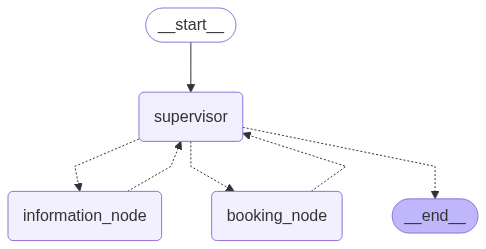

In [256]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [257]:
inputs1 = [
        HumanMessage(content='can you check and make a booking if dentist available on 8 August 2024 at 8 PM?')
    ]

In [258]:
result = app.invoke({'messages': inputs1,'id_number':1111223})


**************************below is my state right after entering****************************
{'messages': [HumanMessage(content='can you check and make a booking if dentist available on 8 August 2024 at 8 PM?', additional_kwargs={}, response_metadata={})], 'id_number': 1111223}
***********************this is my message*****************************************
[{'role': 'system', 'content': "You are a supervisor tasked with managing a conversation between following workers. ### SPECIALIZED ASSISTANT:\nWORKER: information_node \nDESCRIPTION: specialized agent to provide information related to availability of doctors or any FAQs related to hospital.\n\nWORKER: booking_node \nDESCRIPTION: specialized agent to only to book, cancel or reschedule appointment\n\nWORKER: FINISH \nDESCRIPTION: If User Query is answered and route to Finished\n\nYour primary role is to help the user make an appointment with the doctor and provide updates on FAQs and doctor's availability. If a customer requests to

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [195]:
result["messages"]


[HumanMessage(content="user's identification number is 1111223", additional_kwargs={}, response_metadata={}, id='e2c422e1-06b8-4309-9926-7ab62d34a8fe'),
 AIMessage(content='Thank you for providing your ID number. Could you please let me know what you would like to do? Are you looking to set, cancel, or reschedule an appointment? Please provide any additional details needed for your request.', additional_kwargs={}, response_metadata={}, name='booking_node')]

In [196]:
inputs2 = [
        HumanMessage(content='I would like to book a new appointment with Kevin Anderson on 03-09-2024 at 3 pm, please')
    ]

In [198]:
result = app.invoke({'messages': inputs2,'id_number':10232303})


**************************below is my state right after entering****************************
{'messages': [HumanMessage(content='I would like to book a new appointment with Kevin Anderson on 03-09-2024 at 3 pm, please', additional_kwargs={}, response_metadata={})], 'id_number': 10232303}
***********************this is my message*****************************************
[{'role': 'system', 'content': "You are a supervisor tasked with managing a conversation between following workers. ### SPECIALIZED ASSISTANT:\nWORKER: information_node \nDESCRIPTION: specialized agent to provide information related to availability of doctors or any FAQs related to hospital.\n\nWORKER: booking_node \nDESCRIPTION: specialized agent to only to book, cancel or reschedule appointment\n\nWORKER: FINISH \nDESCRIPTION: If User Query is answered and route to Finished\n\nYour primary role is to help the user make an appointment with the doctor and provide updates on FAQs and doctor's availability. If a customer r

In [200]:
result["messages"]

[HumanMessage(content="user's identification number is 10232303", additional_kwargs={}, response_metadata={}, id='cedf9d01-b250-42da-8c09-1f7fcb29fa17'),
 AIMessage(content='Please let me know how I can assist you with your appointment. Are you looking to set a new appointment, cancel, or reschedule an existing one?', additional_kwargs={}, response_metadata={}, name='booking_node', id='87ffda56-05d2-4fc1-b288-452e2d36754b'),
 AIMessage(content="\nPlease mention the relevant details such as the doctor's name and the date and time for the appointment or any changes you wish to make.", additional_kwargs={}, response_metadata={}, name='booking_node')]

In [201]:
result["messages"][-1].content


"\nPlease mention the relevant details such as the doctor's name and the date and time for the appointment or any changes you wish to make."